In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


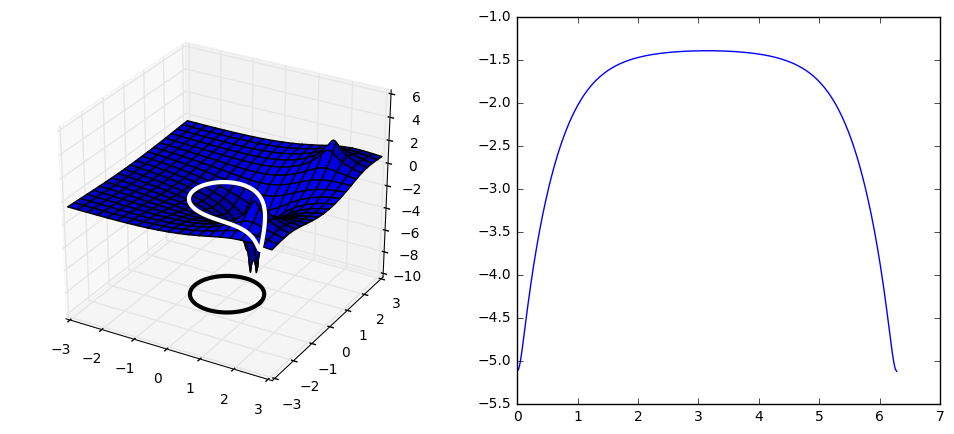

In [2]:
# Illustration of the "landscape" defined by poles and zeros 
# and the corresponding magnitude response

zeros = [0.7, 0.9]
poles = [2 + 2*1j, 2 - 2*1j]

x_max = 3
n_x = 200

x = np.linspace(-x_max, x_max, n_x)
X, Y = np.meshgrid(x, x)

H = np.ones(X.shape, dtype=np.complex128)
t = np.linspace(0, 2*np.pi, 256)
circz = np.ones(t.shape, dtype=np.complex128)

for zero in zeros:
    H *= X + 1j*Y - zero
    circz *= np.cos(t) + 1j*np.sin(t) - zero
    
for pole in poles:
    H /= X + 1j*Y - pole
    circz /= np.cos(t) + 1j*np.sin(t) - pole


from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12, 5))
ax = fig.add_subplot(121, projection='3d')
ax.plot_surface(X, Y, np.log(np.abs(H)))
ax.plot(np.cos(t), np.sin(t), np.log(np.abs(circz)), 'w', linewidth=3)
ax.plot(np.cos(t), np.sin(t), -10, 'k', linewidth=3)


ax = fig.add_subplot(122)
ax.plot(t, np.log(np.abs(circz)))



# Illustration of a couple of basic filters

In [111]:
# First generate the test signal---a sine sweep, going from
# f1 to f2 in frequency

from IPython.display import Audio

f1 = 100
f2 = 5000
fs = 44100
T = 10

k = (f2 - f1)/T
t_sweep = np.linspace(0, (T-1/fs), fs*T)
len_sweep = len(t_sweep)

x = np.zeros(len_sweep)
x = np.sin(np.pi*2*(f1*t_sweep + k/2*t_sweep**2))  # the sweep signal

Audio(x, rate=fs)

In [114]:
# Convolve with a truncated lowpass filter

f_c = 2000
Omega_c = 2*np.pi*f_c
omega_c = Omega_c * (1 / fs)

n_max = 200
n = np.arange(-n_max, n_max)
h_lp = np.sinc(omega_c / np.pi * n) * omega_c / np.pi

from scipy import signal
y_lp = signal.fftconvolve(x, h_lp)

Audio(y_lp, rate=fs)

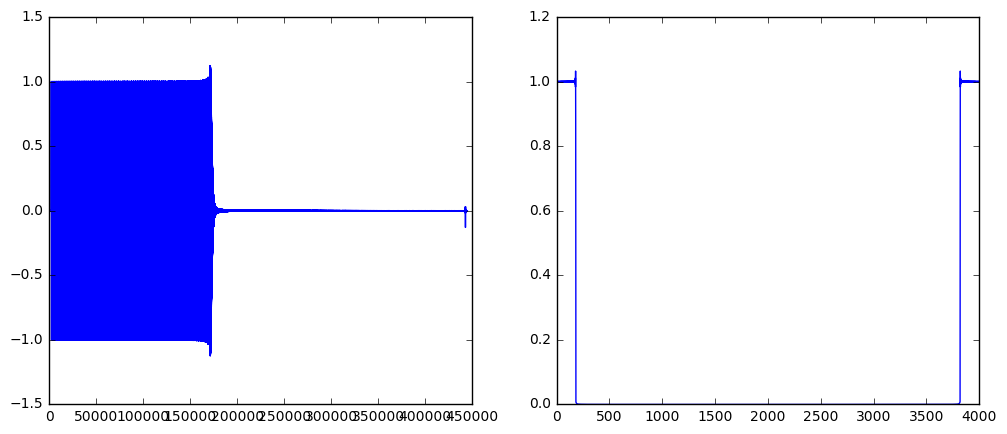

In [115]:
# Plot to see what happens in time and spectrum

fig = plt.figure(figsize(12, 5))
ax = fig.add_subplot(121)
plt.plot(y_lp)

ax = fig.add_subplot(122)
plt.plot(np.abs(np.fft.fft(h_lp)))

In [102]:
# Do the highpass filter

h_hp = -h_lp
h_hp[n == 0] += 1

y_hp = signal.fftconvolve(x, h_hp)
Audio(y_hp, rate=fs)

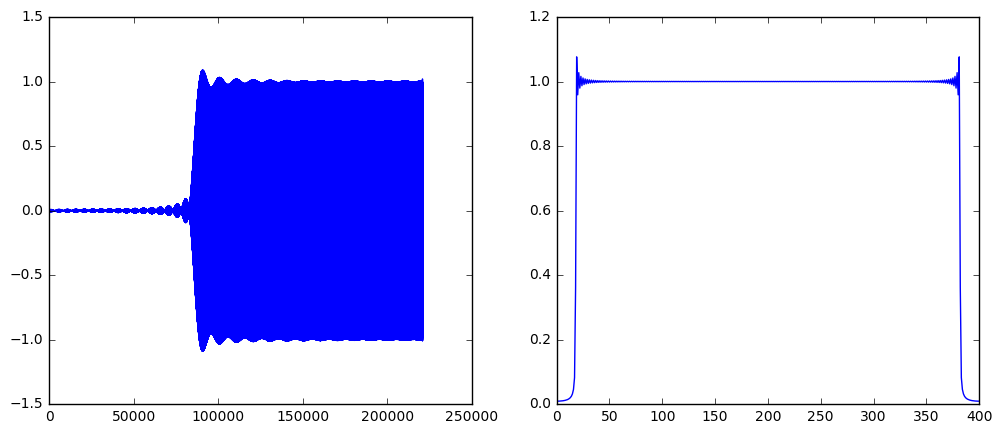

In [104]:
# Plot again

fig = plt.figure(figsize(12, 5))
ax = fig.add_subplot(121)
plt.plot(y_hp)

ax = fig.add_subplot(122)
plt.plot(np.abs(np.fft.fft(h_hp)))

In [117]:
# Try a bandpass filter

f_c = 500
Omega_c = 2*np.pi*f_c
omega_c = Omega_c * (1 / fs)
f_0 = 2000
omega_0 = np.pi*2*f_c / fs

n_max = 2000
n = np.arange(-n_max, n_max)

h_bp = 2*np.cos(omega_0*n)*np.sinc(omega_c / np.pi * n) * omega_c / np.pi
y_bp = signal.fftconvolve(x, h_bp)

Audio(y_bp, rate=fs)

In [ ]:
# Plot the bandpass stuff

fig = plt.figure(figsize(12, 5))
ax = fig.add_subplot(121)
plt.plot(y_bp)

ax = fig.add_subplot(122)
plt.plot(np.abs(np.fft.fft(h_bp)))

# Importance of phase

(-0.1, 1.1)

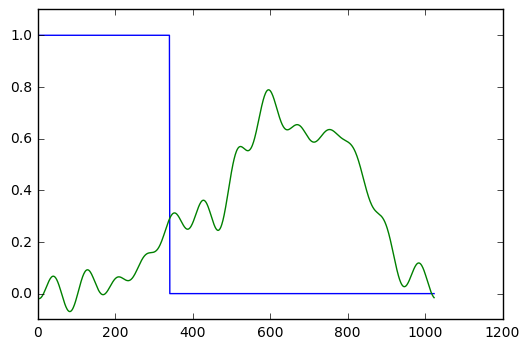

In [117]:
# Linear vs nonlinear phase on the example of 
# delaying a rectangular pulse

t_max = 3
T = 1
N = 1024
t = np.linspace(0, t_max, N)

x = np.zeros(t.shape)
x[t < T] = 1

X = np.fft.fft(x)
k = np.arange(N)

# Lowpass
X[15:-15] = 0

# Phase
Y = X*np.exp(1j* (2*np.pi/ N*k) * (-380) )
Y *= np.exp(1j*2*np.pi/N*500*np.random.rand(N))

# By looking at magnitudes only, can't say much about the signal shape

plt.plot(x)
plt.plot(np.fft.ifft(Y).real)
plt.ylim(-0.1, 1.1)

## What is more important? Phase or magnitude?

In [119]:
# First, an audio example: we'll synthesize a signal by 
# taking the phase spectrum of one clip (singing) and the 
# magnitude spectrum of another clip (music)

import scipy.io.wavfile as wav
from IPython.display import Audio

_, y = wav.read('audio/singing.wav')
# ... wrong sampling rate but OK

fs, x = wav.read('audio/herbie.wav')

x = x[:len(y)]

# change y to x to listen to both clips
Audio(y, rate=fs)

/Users/doksa/anaconda/lib/python3.5/site-packages/scipy/io/wavfile.py:267: WavFileWarning: Chunk (non-data) not understood, skipping it.
  WavFileWarning)


In [120]:
# syntesize the new signal

X = np.fft.fft(x)
Y = np.fft.fft(y)

Z = np.abs(X) * np.exp(1j*np.angle(Y))
z = np.real(np.fft.ifft(Z))

Audio(z, rate=fs)

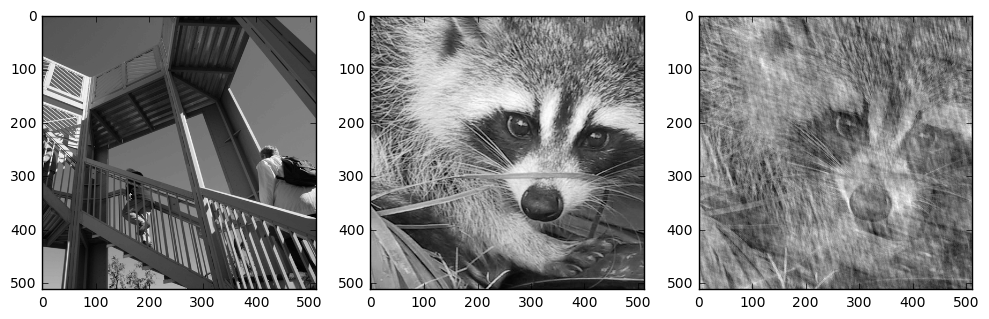

In [10]:
# Do a similar example 

from scipy.misc import *

x = ascent()
y = face()[100:100+512,300:300+512,0]

X = np.fft.fft2(x)
Y = np.fft.fft2(y)

Z = np.abs(X) * np.exp(1j*np.angle(Y))

z = np.real(np.fft.ifft2(Z))

fig = plt.figure(figsize=(12, 5))
ax = fig.add_subplot(131)
plt.imshow(x, cmap='gray')

ax = fig.add_subplot(132)
plt.imshow(y, cmap='gray')

ax = fig.add_subplot(133)
plt.imshow(z, cmap='gray')